# **Results**

This notebook presents the results of the designed framework for the automatic evaluation of the generated content.

Firstly, we plot the length distribution to investigate if there is any underlying pattern in the way the models generate questions and answer according to the emplloyed prompting technique. Additionally, we complared them with the corresponding distribution of ground-truth questionnaires.

Then, the following insights are shown:
- Best and Worst based on: Conversion Error, not json error, syntactic intraquestionnaire similarity, semantic score, serendipity
- Plot of trend variation on different values for temperature and frequency penalty.

In [1]:
import json
import os
import sys
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1])+'\\src')

from src.visualization.PairResultVisualizer import PairResultVisualizer
from src.visualization.GlobalResultVisualizer import GlobalResultVisualizer

In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

## **Length distributions**

In [3]:
config_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "src", "visualization", "GPT_experiment_pairs.json")
with open(config_path, "r") as f:
    experiment_confs = json.load(f)
f.close()

pairs = experiment_confs["pairs"]

In [4]:
gpt_4_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

pairs_to_remove = []

for pair in pairs:
    if pair["id"].__contains__("GPT-4"):
        gpt_4_preds.add_pair(pair)
        gpt_4_preds.load_data(project_root=PROJECT_ROOT)
        
        pairs_to_remove.append(pair)

for pair in pairs_to_remove:
    pairs.remove(pair)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Repos\\llaraspata\\HRMQuestionnaireGenerationUsingLLM\\models\\1.0\\Survey\\GPT\\0s_gpt-4-dev_4000MT_0.25T_0FP_JSON\\predictions.pkl'

In [5]:
gpt_35_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

for pair in pairs:
    gpt_35_preds.add_pair(pair)
    gpt_35_preds.load_data(project_root=PROJECT_ROOT)

### **Questions**

In [6]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_full_questions, gpt_35_preds.one_shot_full_questions, "NAME", "GPT-3.5-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_questions, gpt_35_preds.one_shot_questions, "NAME", "GPT-3.5-Turbo [Task 2]", "Question")

In [7]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_full_questions, gpt_4_preds.one_shot_full_questions, "NAME", "GPT-4-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_questions, gpt_4_preds.one_shot_questions, "NAME", "GPT-4-Turbo [Task 2]", "Question")

### **Answers**

In [8]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_full_answers, gpt_35_preds.one_shot_full_answers, "ANSWER", "GPT-3.5-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_answers, gpt_35_preds.one_shot_answers, "ANSWER", "GPT-3.5-Turbo [Task 2]", "Answer")

In [9]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_full_answers, gpt_4_preds.one_shot_full_answers, "ANSWER", "GPT-4-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_answers, gpt_4_preds.one_shot_answers, "ANSWER", "GPT-4-Turbo [Task 2]", "Answer")

## **Global results**

In [10]:
grv = GlobalResultVisualizer(project_root=PROJECT_ROOT)
bw_conversion_errors_df, bw_json_errors_df, bw_intraquestionnaire_similarity_df, bw_semantic_metrics_df, bw_serendipity_scores_df = grv.get_best_and_worst_experiments()

In [11]:
bw_conversion_errors_df[["EXPERIMENT_ID", "CONVERSION_ERROR_RATE"]]

,EXPERIMENT_ID,CONVERSION_ERROR_RATE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_1FP,100.0
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
4,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
5,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
6,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
9,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0


In [12]:
bw_json_errors_df[["EXPERIMENT_ID", "JSON_ERROR_RATE"]]

,EXPERIMENT_ID,JSON_ERROR_RATE
0,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
1,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
4,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
5,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
6,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
9,0s_gpt-4-dev_4000MT_0T_0FP_JSON,0.0


In [13]:
bw_intraquestionnaire_similarity_df[["EXPERIMENT_ID", "INTRAQSTN_ROUGE_L_F1_SCORE"]]

,EXPERIMENT_ID,INTRAQSTN_ROUGE_L_F1_SCORE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.390810
1,0s_gpt-4-dev_4000MT_0.5T_1FP_JSON,0.142613


In [14]:
bw_semantic_metrics_df[["EXPERIMENT_ID", "FINAL_SCORE"]]

,EXPERIMENT_ID,FINAL_SCORE
0,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.650004
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,0.333347


In [15]:
bw_serendipity_scores_df[["EXPERIMENT_ID", "AVG_SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,AVG_SERENDIPITY_SCORE
0,0s_gpt-4-dev_4000MT_0T_1FP_JSON,0.872126
1,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.666667
2,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.666667


## **Plots**

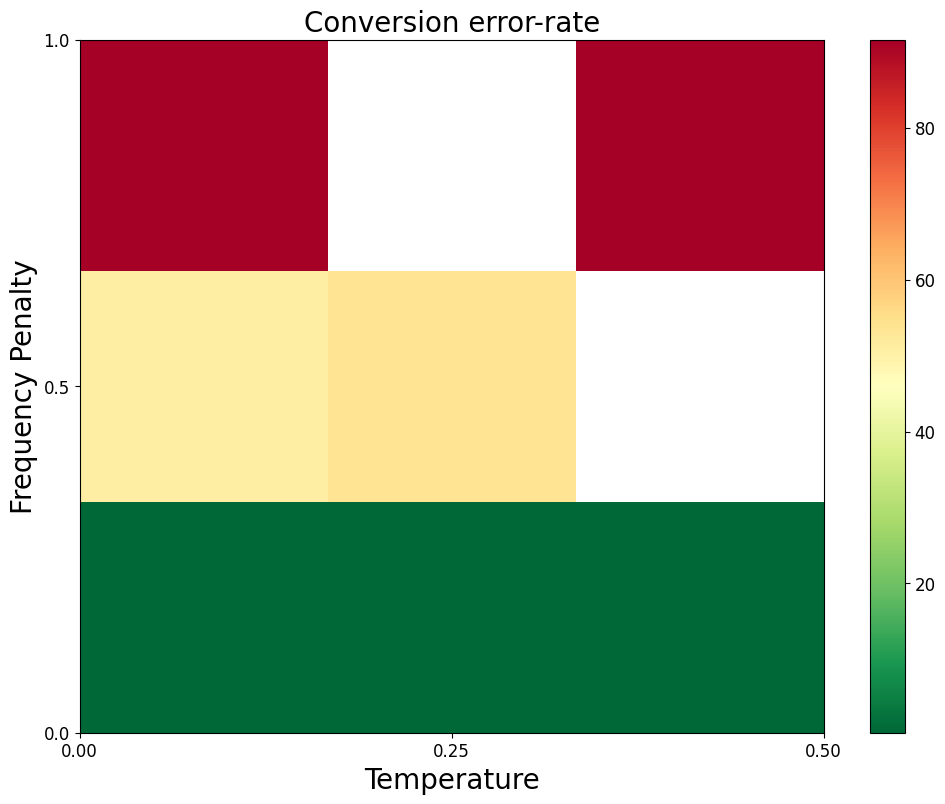

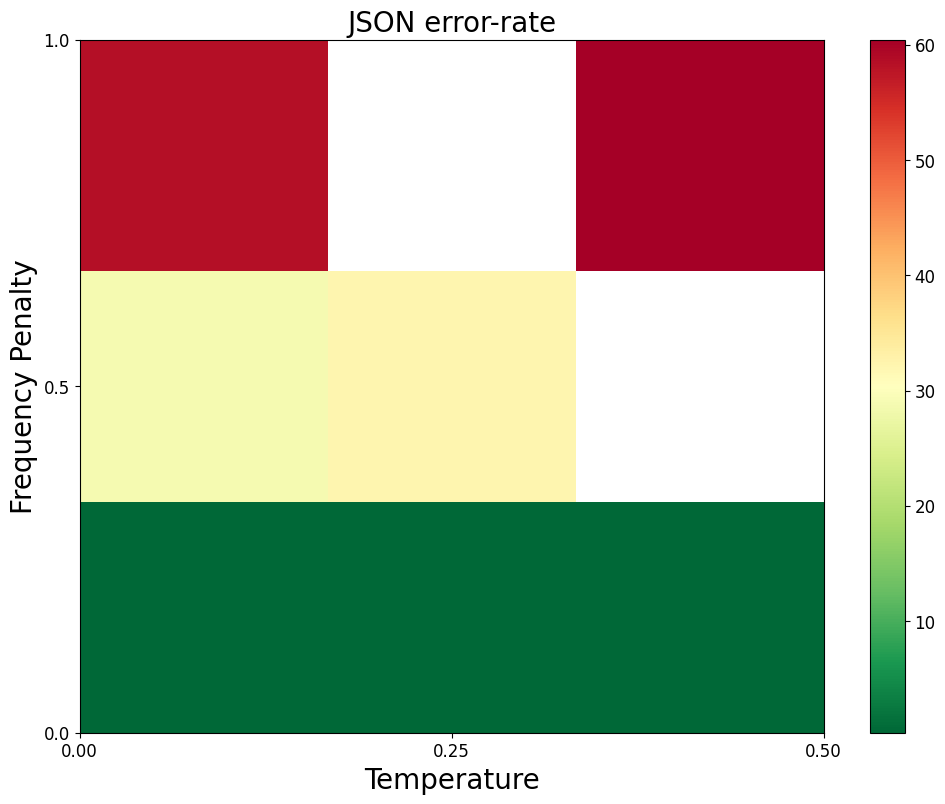

In [16]:
grv.plot_errors_heatmap()